# Predicting Customer Revenue Using Linear Regression
* An exmample of solving business problems that require the prediction of quantities.

In [ ]:
import pandas as pd 

In [49]:
data = pd.read_csv('../data_sets/azra_retail_transactions.csv')
data2 = pd.read_csv('../data_sets/wrangled_transactions.csv')

#  Creating Features for Customer Revenue Prediction

In [17]:
import pandas as pd
import datetime as dt

class RetailTransactionAnalyzer:
    """
    The class is designed to perform analysis on retail transaction data. Here's a description 
    of what each method in the class does:The class encapsulates the data loading, preprocessing, 
    aggregation, feature derivation, and cleaning steps for retail transaction analysis. It 
    provides a structured workflow to transform raw transaction data into a cleaned dataset 
    suitable for further analysis or modeling.
    """
    def __init__(self, data):
        self.df = data
    
    def load_data(self):
        print("First five records of the DataFrame:")
        print(self.df.head())
    
    def preprocess_data(self):
        self.df['InvoiceDate'] = pd.to_datetime(self.df['InvoiceDate'])
        self.df['revenue'] = self.df['UnitPrice'] * self.df['Quantity']
    
    def aggregate_data(self):
        operations = {'revenue':'sum', 'InvoiceDate':'first', 'CustomerID':'first'}
        self.df = self.df.groupby('InvoiceNo').agg(operations)
    
    def derive_features(self):
        self.df['year'] = self.df['InvoiceDate'].dt.year
        self.df['days_since'] = (dt.datetime(year=2019, month=12, day=31) - self.df['InvoiceDate']).apply(
            lambda x: x.days)
        
        operations = {'revenue':'sum', 'days_since':['max', 'min', 'nunique']}
        X = self.df[self.df['year'] == 2019].groupby('CustomerID').agg(operations)
        
        X.columns = [' '.join(col).strip() for col in X.columns.values]
        X['avg_order_cost'] = X['revenue sum'] / X['days_since nunique']
        
        y = self.df[self.df['year'] == 2020].groupby('CustomerID')['revenue'].sum()
        
        wrangled_df = pd.concat([X, y], axis=1)
        wrangled_df.columns = ['revenue_2019', 'days_since_first_purchase', 'days_since_last_purchase',
                               'number_of_purchases', 'avg_order_cost', 'revenue_2020']
        
        wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
        wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]
        wrangled_df = wrangled_df[wrangled_df.revenue_2020 < ((wrangled_df.revenue_2020.median()) +
                                                               wrangled_df.revenue_2020.std()*3)]
        wrangled_df = wrangled_df[wrangled_df.revenue_2019 < ((wrangled_df.revenue_2019.median()) +
                                                               wrangled_df.revenue_2019.std()*3)]
        
        print("Final cleaned dataset:")
        print(wrangled_df.head())
        
        wrangled_df.to_csv('../data_sets/wrangled_transactions.csv')

# Usage
analyzer = RetailTransactionAnalyzer(data)
analyzer.load_data()
analyzer.preprocess_data()
analyzer.aggregate_data()
analyzer.derive_features()


First five records of the DataFrame:
   InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

          InvoiceDate  UnitPrice  CustomerID         Country  revenue  
0 2020-03-16 11:36:00       1.25     18231.0  United Kingdom     15.0  
1 2020-07-13 12:18:00       1.25     16225.0  United Kingdom      7.5  
2 2020-04-01 13:20:00       0.85     12949.0  United Kingdom     20.4  
3 2020-01-09 15:23:00       2.95     14395.0  United Kingdom     11.8  
4 2020-07-27 09:52:00       1.65     17068.0  United Kingdom     16.5  
Final cleaned dataset:
            revenue_2019  days_since_first_purchase  days_since_last_

#  Examining Relationships between Predictors and the Outcome

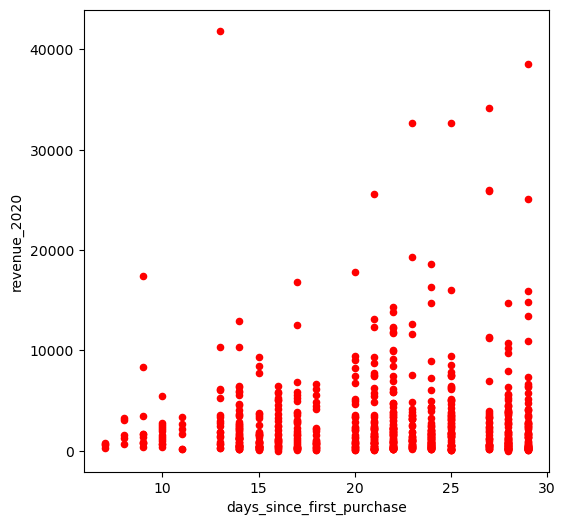

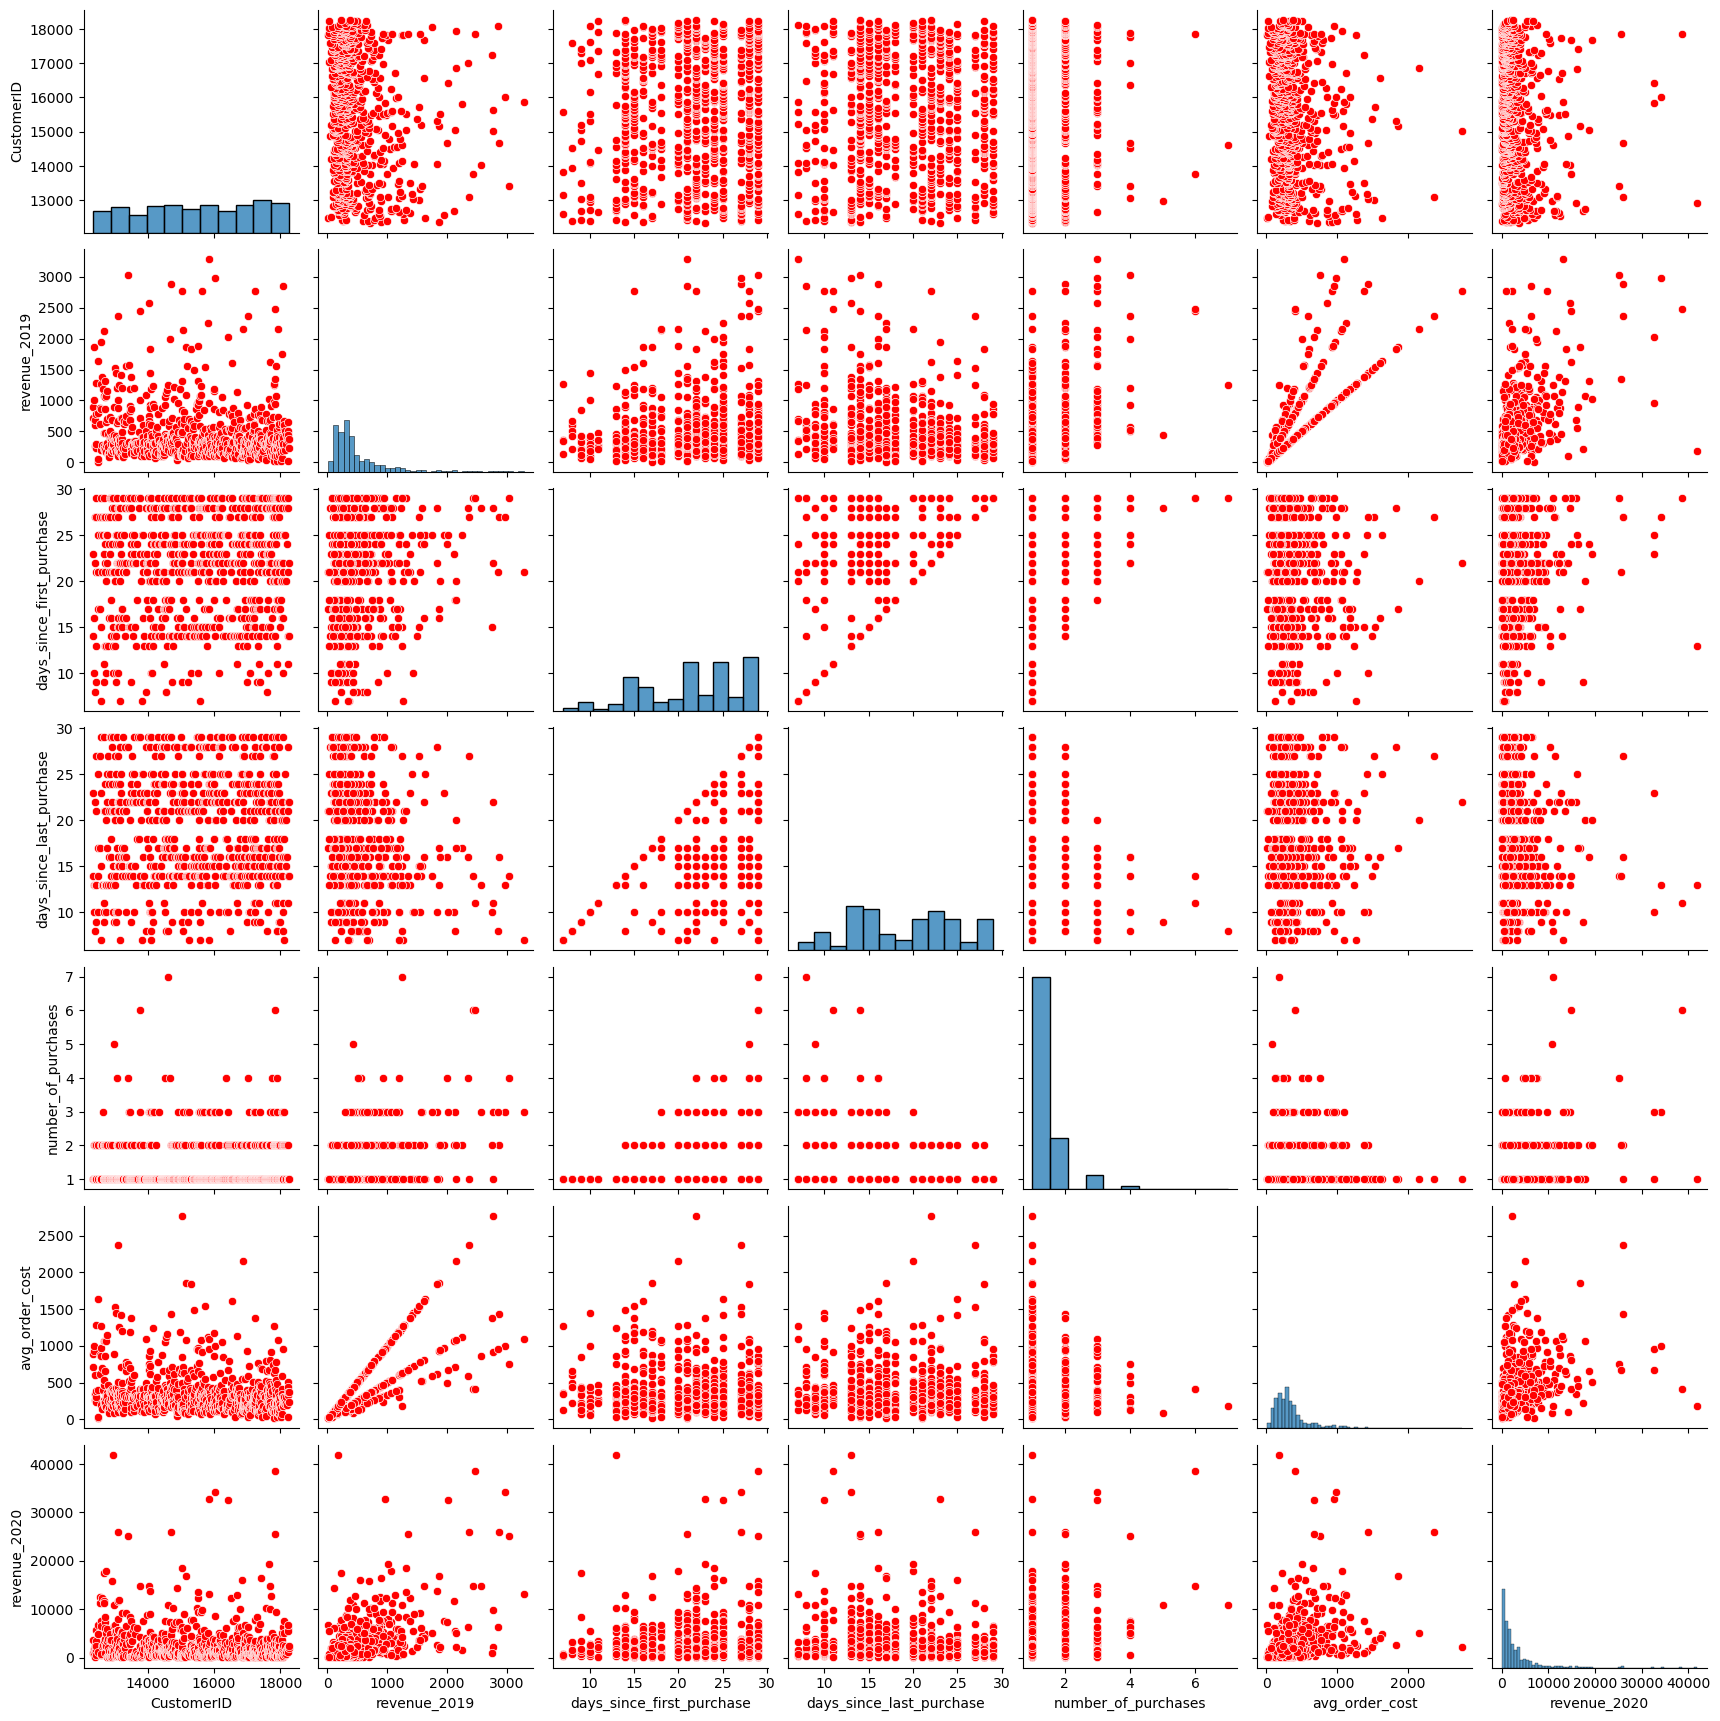

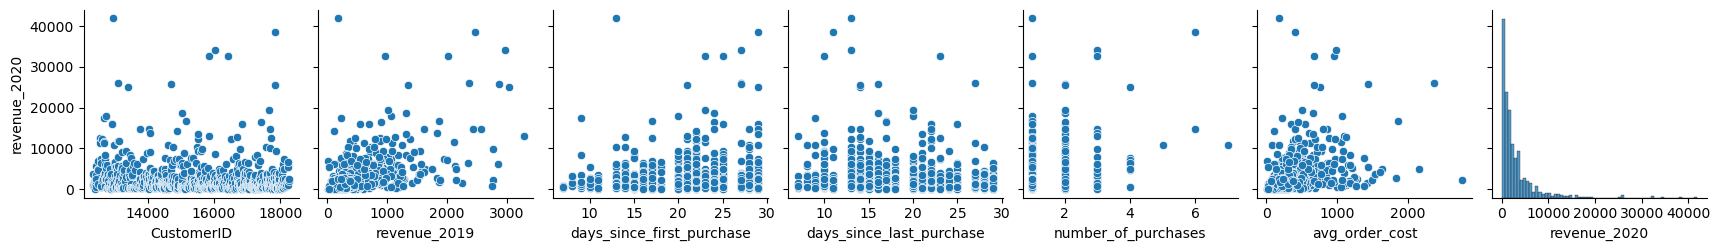

                           CustomerID  revenue_2019  \
CustomerID                   1.000000     -0.102341   
revenue_2019                -0.102341      1.000000   
days_since_first_purchase    0.059472      0.109692   
days_since_last_purchase     0.027937     -0.254964   
number_of_purchases          0.043260      0.504438   
avg_order_cost              -0.157521      0.779401   
revenue_2020                -0.095530      0.548234   

                           days_since_first_purchase  \
CustomerID                                  0.059472   
revenue_2019                                0.109692   
days_since_first_purchase                   1.000000   
days_since_last_purchase                    0.641574   
number_of_purchases                         0.327502   
avg_order_cost                             -0.074321   
revenue_2020                                0.061743   

                           days_since_last_purchase  number_of_purchases  \
CustomerID                        

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class StoreLocationAnalysis:
    def __init__(self, data):
        self.df = data

    def import_data(self):
        self.df = pd.read_csv(self.data_path, index_col='CustomerID')

    def scatter_plot(self, x, y):
        self.df.plot.scatter(x=x, y=y, figsize=[6, 6], color='red')
        plt.show()

    def pairplot_all(self):
        sns.pairplot(self.df, plot_kws={'color': 'red'})
        plt.show()

    def pairplot_revenue(self):
        sns.pairplot(self.df, x_vars=self.df.columns, y_vars="revenue_2020")
        plt.show()

    def calculate_correlations(self):
        correlations = self.df.corr()
        print(correlations)

# Usage example
analysis = StoreLocationAnalysis(data2)
#analysis.import_data()
analysis.scatter_plot('days_since_first_purchase', 'revenue_2020')
analysis.pairplot_all()
analysis.pairplot_revenue()
analysis.calculate_correlations()


# Examining the Relationship between Store Location and Revenue

    revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80              3.0       30527.57               1407.0   
1  38628.37              3.0       30185.49               1025.0   
2  39715.16              1.0       32182.24               1498.0   
3  35593.30              5.0       29728.65               2340.0   
4  35128.18              4.0       30691.17                847.0   

   population_density  location_age  
0              3302.0          12.0  
1              4422.0          11.0  
2              3260.0          12.0  
3              4325.0          10.0  
4              3774.0          11.0  


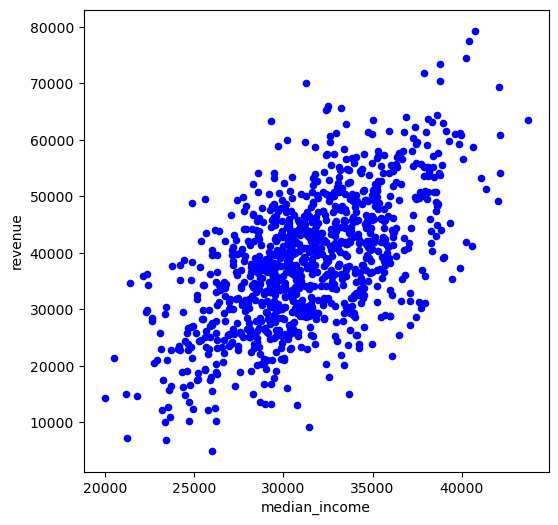

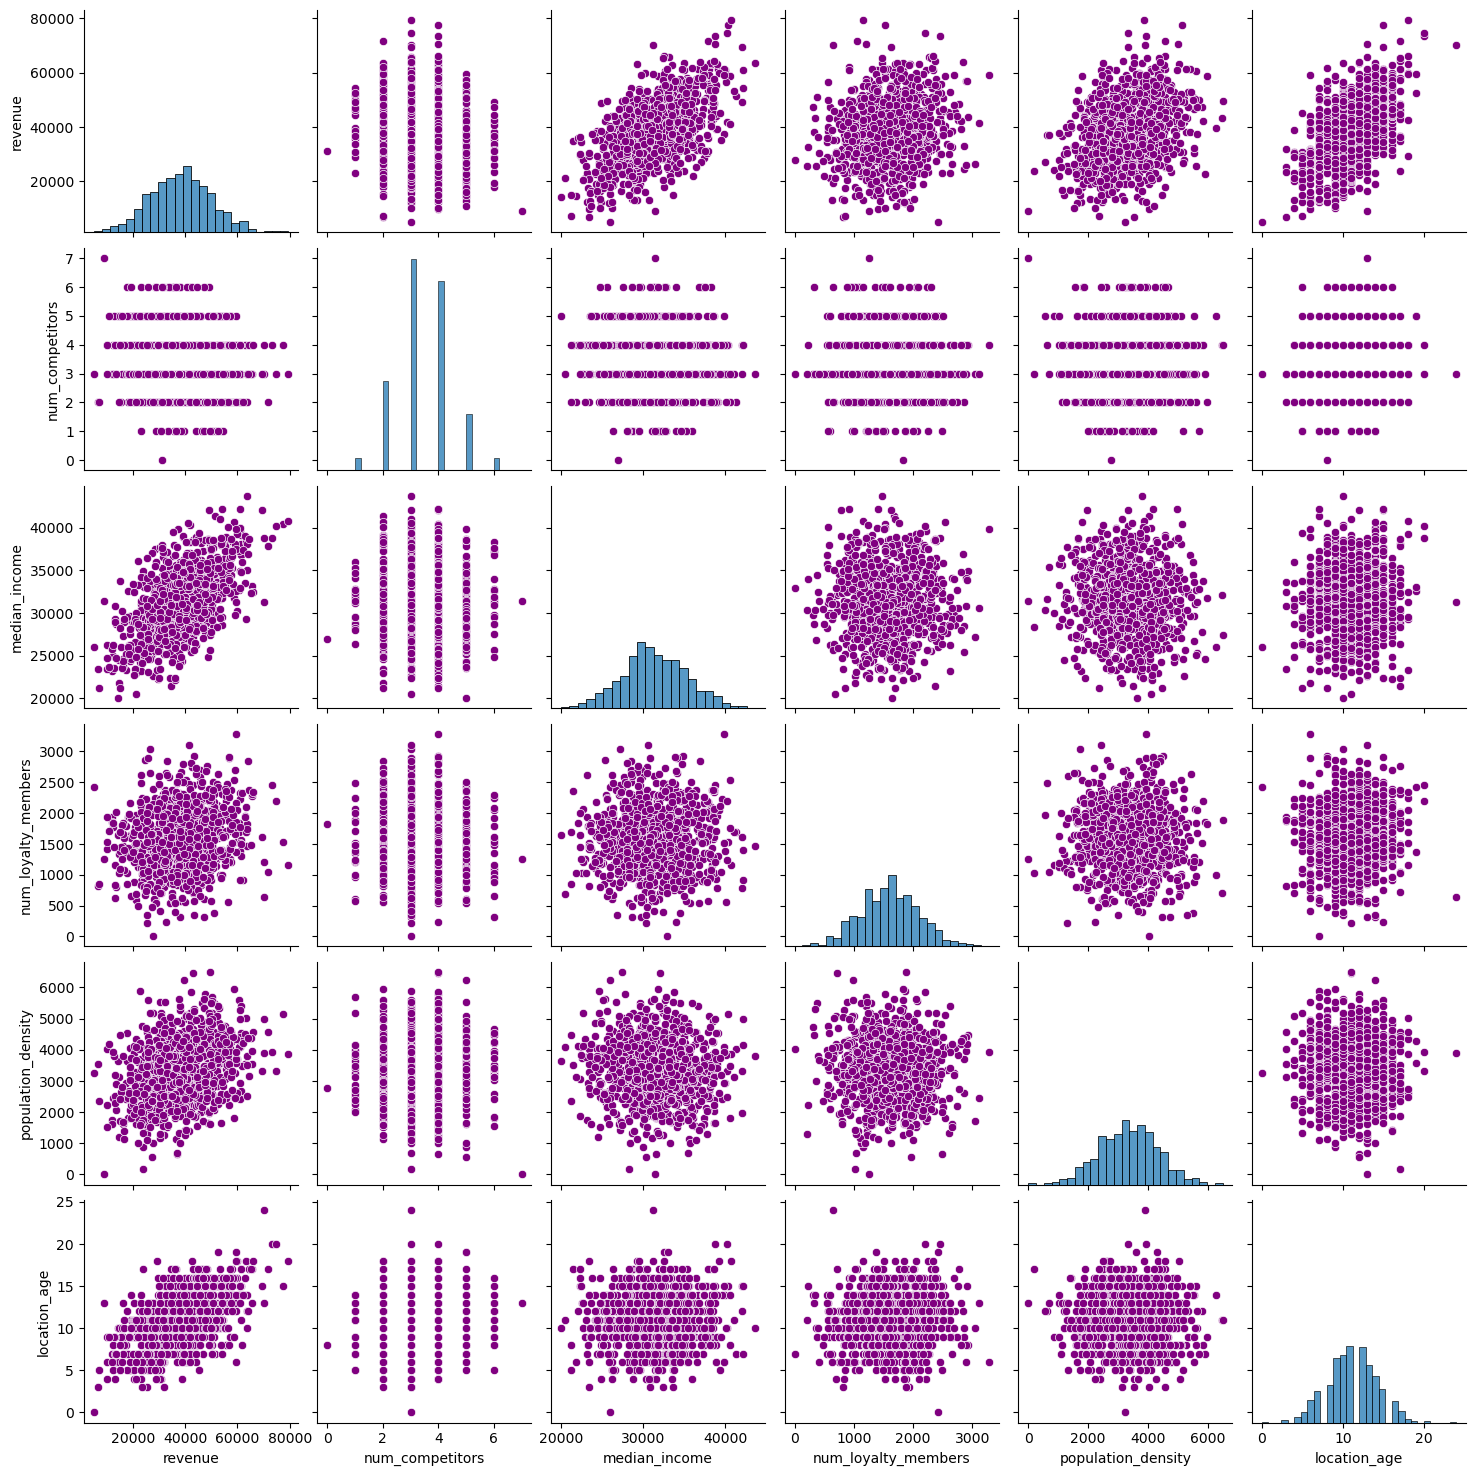

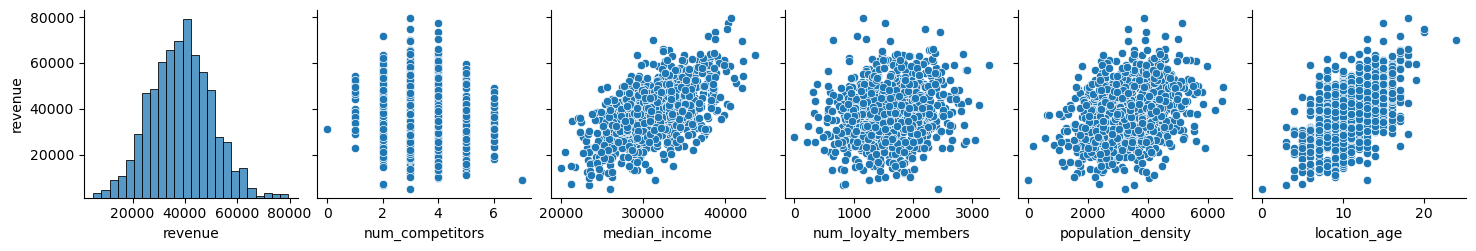

                      revenue  num_competitors  median_income  \
revenue              1.000000        -0.156685       0.601888   
num_competitors     -0.156685         1.000000      -0.018398   
median_income        0.601888        -0.018398       1.000000   
num_loyalty_members  0.173432        -0.027283       0.011891   
population_density   0.311653         0.035768      -0.041697   
location_age         0.552773         0.053796       0.045621   

                     num_loyalty_members  population_density  location_age  
revenue                         0.173432            0.311653      0.552773  
num_competitors                -0.027283            0.035768      0.053796  
median_income                   0.011891           -0.041697      0.045621  
num_loyalty_members             1.000000           -0.028611      0.036016  
population_density             -0.028611            1.000000     -0.009977  
location_age                    0.036016           -0.009977      1.000000  


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class StoreLocationAnalysis:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None

    def load_data(self):
        self.df = pd.read_csv(self.data_path)

    def print_top_records(self):
        print(self.df.head())

    def scatter_plot(self, x, y):
        self.df.plot.scatter(x=x, y=y, figsize=[6, 6], color='blue')
        plt.show()

    def pairplot(self):
        sns.pairplot(self.df, plot_kws={'color': 'purple'})
        plt.show()

    def pairplot_revenue(self):
        sns.pairplot(self.df, x_vars=self.df.columns, y_vars="revenue")
        plt.show()

    def calculate_correlations(self):
        correlations = self.df.corr()
        print(correlations)

# Usage example
data_path = '../data_sets/location_rev.csv'
analysis = StoreLocationAnalysis(data_path)
analysis.load_data()
analysis.print_top_records()
analysis.scatter_plot('median_income', 'revenue')
analysis.pairplot()
analysis.pairplot_revenue()
analysis.calculate_correlations()


# Building a Linear Model Predicting Customer Spend

                           revenue_2019  days_since_first_purchase  \
revenue_2019                   1.000000                   0.109692   
days_since_first_purchase      0.109692                   1.000000   
days_since_last_purchase      -0.254964                   0.641574   
number_of_purchases            0.504438                   0.327502   
avg_order_cost                 0.779401                  -0.074321   
revenue_2020                   0.548234                   0.061743   

                           days_since_last_purchase  number_of_purchases  \
revenue_2019                              -0.254964             0.504438   
days_since_first_purchase                  0.641574             0.327502   
days_since_last_purchase                   1.000000            -0.398268   
number_of_purchases                       -0.398268             1.000000   
avg_order_cost                            -0.054051            -0.012466   
revenue_2020                              -0.171294  

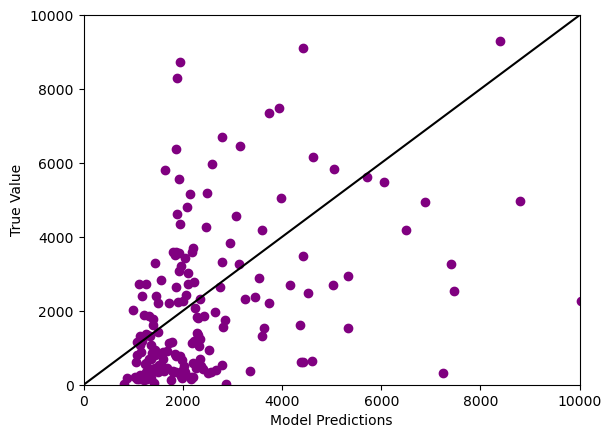

[[1.         0.61257401]
 [0.61257401 1.        ]]


In [62]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

class RevenuePredictionModel:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.model = None

    def import_data(self):
        self.df = pd.read_csv(self.data_path, index_col='CustomerID')

    def calculate_correlations(self):
        correlations = self.df.corr()
        print(correlations)

    def split_data(self, random_state=100):
        X = self.df[['revenue_2019', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost']]
        y = self.df['revenue_2020']
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        model = LinearRegression()
        model.fit(X_train, y_train)
        return model

    def predict(self, model, data):
        single_customer = pd.DataFrame(data)
        return model.predict(single_customer)

    def plot_predictions(self, model, X_test, y_test):
        plt.scatter(model.predict(X_test), y_test, color='purple')
        plt.xlim(0, 10000)
        plt.ylim(0, 10000)
        plt.plot([0, 10000], [0, 10000], 'k-')
        plt.xlabel('Model Predictions')
        plt.ylabel('True Value')
        plt.show()

    def calculate_correlation(self, model, X_test, y_test):
        correlation = np.corrcoef(model.predict(X_test), y_test)
        print(correlation)

    def run(self):
        self.import_data()
        self.calculate_correlations()
        X_train, X_test, y_train, y_test = self.split_data()
        self.model = self.train_model(X_train, y_train)
        prediction_data = {'revenue_2019': [1000],
                           'days_since_last_purchase': [20],
                           'number_of_purchases': [2],
                           'avg_order_cost': [500]}
        predicted_revenue = self.predict(self.model, prediction_data)
        print("Predicted Revenue:", predicted_revenue)
        self.plot_predictions(self.model, X_test, y_test)
        self.calculate_correlation(self.model, X_test, y_test)

# Usage example
data_path = '../data_sets/wrangled_transactions.csv'
model = RevenuePredictionModel(data_path)
model.run()

# Predicting Store Revenue Using Linear Regression

In [54]:
data2

,CustomerID,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
0,12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
1,12348.0,892.80,14.0,14.0,1.0,892.80,904.44
2,12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
3,12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
4,12383.0,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...,...
733,18229.0,653.20,29.0,22.0,2.0,326.60,6623.70
734,18239.0,438.10,28.0,28.0,1.0,438.10,1123.51
735,18245.0,365.73,11.0,11.0,1.0,365.73,2201.33
736,18259.0,376.30,22.0,22.0,1.0,376.30,1962.30
